# 前置作業 (安裝相關套件)

In [0]:
# !sudo apt-get update
# !sudo apt-get upgrade
# !sudo apt autoremove

# !pip install selenium
# !apt install chromium-chromedriver

# !wget https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SourceHanSansTC.zip
# !unzip SourceHanSansTC.zip
# !rm SourceHanSansTC.zip
# !mv ./SourceHanSansTC/* /usr/share/fonts/truetype     # !mv /SourceHanSansTC/SourceHanSansTC-Regular.otf /usr/share/fonts/truetype

# !wget https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
# !wget https://github.com/smalloshin/mirror-related-news-api/blob/master/v2.0/dict/moe.dict
# !wget https://raw.githubusercontent.com/tomlinNTUB/Python/master/%E4%B8%AD%E6%96%87%E5%88%86%E8%A9%9E/%E5%81%9C%E7%94%A8%E8%A9%9E.txt

# !ls /usr/share/fonts/truetype
# !ls /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/matplotlibrc

# 載入相關套件

In [0]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import numpy as np
import time
import re

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#  自訂網頁解析方法

In [0]:
# 自訂網頁解析方法
def html_parser(url,counts=0,tag='ul',index=-3):
    if type(url) == int:
       url = category_number(url)
       
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    browser = webdriver.Chrome('chromedriver',options=options)
    browser.get(url)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    # 設定搜尋文章數量
    count = 1
    title_list = []
    category_list = []
    while (count <= counts) :
        html_source = browser.page_source
        soup = BeautifulSoup(html_source, 'html.parser')

        for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
            # print(artical)
            source = artical.find('div', class_ ="sc-gacfCG bPSpUf").text
            date = artical.span.text
            topic = artical.a['title']            
            contex = artical.p.text            
            href = artical.a["href"]

            if topic not in category_list:
                count += 1
                category_list.append([source, date, topic, contex, href])
                time.sleep(0.7)
                browser.execute_script("window.scrollTo(0, 1000000);")

            if count == counts+1:
                df_category = pd.DataFrame(category_list,columns=['source','date','topic','contex','href'])
                return df_category
                browser.quit()
                break
                
                
    # select 搜尋特定 tag 
    else:   
        select = soup.find_all(tag)                     
        results = select[index].find_all("li","item")
        return select,results
        browser.quit()

In [0]:
# 選定分類，查詢文章內容   # df_category.count : category 0 ~ 118
def category_number(number=0):
    if number >118:
        print('超過項目範圍，選取範圍: 0 ~ 118')
        number=118
    topic = category_df.loc[number]['topic']
    category_url = category_df.loc[number]['href']
    synopsis = category_df.loc[number]['synopsis']
    category = category_df.loc[number]['category']
    print(f'category_number:{number}  category:{category}')
    print(f'contex:{contex}')
    print(f'category_url:{category_url}')
    return category_url

# 自訂顯示圖表

In [0]:
# 顯示圖表
def show_dfPlot(df,show=0,size=(20,10),plot_name=''):

    # dataframe 資料整理
    group_df = df.groupby(df.columns[0]).size().reset_index(name='size')
    group_df = group_df.sort_values(by=[group_df.columns[1]], ascending=False)
    x = group_df[group_df.columns[0]]    
    y = group_df[group_df.columns[1]]

    # 調整字體設定
    font_path  = '/usr/share/fonts/truetype/SourceHanSansTC-Regular.otf'
    font = fm.FontProperties(fname=font_path , size= 15)
    plt.rcParams['axes.unicode_minus'] = False

    # 圖表設定
    fig = plt.figure(figsize=size)
    if show == 0:     # pie-chart
        patches,l_text,p_text = plt.pie(y, labels=x, autopct = '%1.1f%%')
        for t in l_text:
            t.set_fontproperties(font)  
        for t in p_text:
            t.set_size(13)
        plt.axis('equal')

    if show == 1:     # bar-chart
        top = len(df)/4
        ratation = 270
        fontsize = 18

        plt.bar(x,y)
        plt.title('分佈',fontproperties=font, fontsize=fontsize) 
        plt.xticks(x,fontproperties=font, fontsize=fontsize,rotation=rotation)
        plt.ylabel('數量',fontproperties=font, fontsize=fontsize) 
        plt.ylim(top=top)  

    if show == 2:     # barh-chart
        plt.barh(x,y)  
        plt.yticks(x,fontproperties=font)

    plt.show()
    fig.savefig(f'{plot_name}.png')
    

# 網站分析

In [6]:
# 網頁 類別 / 列表

home_url = "https://www.cupoy.com/newsfeed/topstory"

categories = html_parser(home_url)

category_list = []
for category in categories[-1]:
    href = f'https://www.cupoy.com{category.a["href"]}'
    contex = category.p.text
    category = category.a['title']
    topic = category + '(mix)'
    category_list.append([category,topic,contex,href])

    topics = html_parser(href,index=-1)
    for topic in topics[-1]:
        href = f'https://www.cupoy.com{topic.a["href"]}'
        contex = topic.p.text
        topic = topic.a['title']
        category_list.append([category,topic,contex,href])


category_df = pd.DataFrame(category_list,columns=['category','topic','synopsis','href'])
category_df

,category,topic,synopsis,href
0,享樂女性,享樂女性(mix),享樂女性是一種有質感的生活方式，分享給所有獨立自主的女性關於美妝保養、健康醫療、情感生活等時...,https://www.cupoy.com/collections/topicgrp/Hed...
1,享樂女性,美食,民以食為天，食是人生存的基本需要。\r\n吃，是一件不可避免帶有各自主觀喜好的事，按照喜歡的...,https://www.cupoy.com/newsfeed/topic/PopularDe...
2,享樂女性,旅遊,法國小說家卡繆說過「旅行幫助我們找回自己」。\r\n旅行不只是簡單的看看風景，對於生活在繁忙...,https://www.cupoy.com/newsfeed/topic/TravelLif...
3,享樂女性,美妝保養,愛美是女人的天性，集結受網友歡迎與推薦的美妝文章與最新資訊，包含許多不同化妝技巧和保養步驟，...,https://www.cupoy.com/newsfeed/topic/beautysal...
4,享樂女性,兩性,愛情是人類之間最美好的感情之一，無數男女從陌生人成為戀人，最後又因為各種各樣的原因走向新的道...,https://www.cupoy.com/newsfeed/topic/gender_tw
...,...,...,...,...
114,職場白領,創業,搜羅創業圈最新消息，各行各業商機分析、產業走向、新創團隊等最新消息。,https://www.cupoy.com/newsfeed/topic/startups_tw
115,閱讀,閱讀(mix),我們的生命有限，很多事情都無法親自去體驗。\r\n因此，利用閱讀、透過文字，我們可以超越時間...,https://www.cupoy.com/collections/topicgrp/Rea...
116,閱讀,好文共賞,文學是高度的藝術和思想，觸動心靈的字句能帶給讀者許多的感動，每個人都可以透過文章創作來發布、...,https://www.cupoy.com/newsfeed/topic/GoodArtic...
117,閱讀,童書,以兒童為閱讀對象的文學作品，兒童的行為均以「追尋快樂，減少痛苦」為原則。因此，兒童文學的最基...,https://www.cupoy.com/newsfeed/topic/PictureBo...


In [0]:
category_df.to_csv(r'category.txt', encoding='utf8', sep=' ', mode='w')

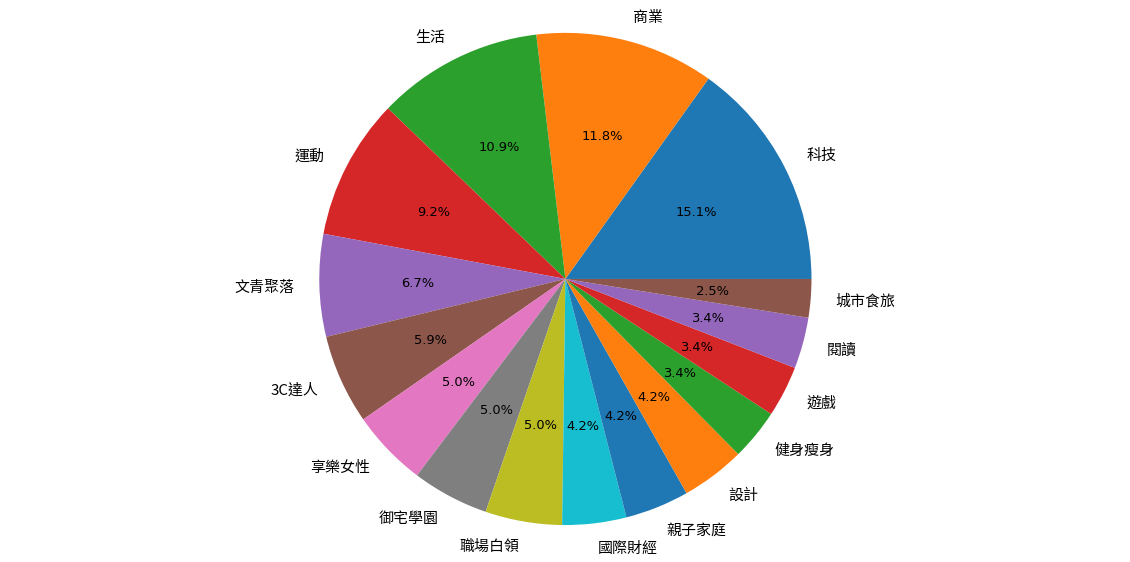

In [8]:
show_dfPlot(category_df,plot_name='category_df')

In [9]:
# url = "https://www.cupoy.com/newsfeed/topstory"
articles_df = html_parser(30,500)
articles_df

category_number:30  category:科技
contex:小說是文學的一種樣式，一般描寫人物故事，塑造多種多樣的人物形象，它是擁有完整布局、發展及主題的文學作品。
category_url:https://www.cupoy.com/newsfeed/topic/cloud_services_tw


,source,date,topic,contex,href
0,iThome 新聞,1 小時前,臉書再度要求政府出手監管網路內容，這次是歐盟 | iThome,臉書執行長Mark Zuckerberg呼籲美國以及歐盟政府，應該針對網路內容制定整體的規則...,https://www.ithome.com.tw/news/135885
1,Soft & Share 軟體開發資訊分享,6 小時前,Terraform 從初學者到高階 – 使用亞馬遜網路服務 - Soft & Share 線...,課程簡介 本課程深入介紹了 Terraform 的基本概念，一路帶你到使用 AWS 的高階技術,https://softnshare.com/terraform-beginner-to-a...
2,UNWIRE.HK 流動科技生活,8 小時前,Instagram CEO 公開解畫 沒有 iPad 版是因為公司人手不足 | 香港 unw...,使用 Instagram 的用戶越來越多，除了透過智能手機，不少用戶亦通過平板使用 Inst...,https://unwire.hk/2020/02/18/instagram-ceo-exp...
3,風傳媒 風生活,8 小時前,網路交友有可能「修成正果」嗎？暢銷書作者破解交友軟體四大關卡：戀人心態決定成敗-風傳媒,相信很多人都有這樣的經驗：在好奇心驅使下開始使用交友軟體，遇見了幾個聊得來的對象，卻總在聊了...,https://www.storm.mg/lifestyle/2254299
4,CUP 媒體,1 天前,方俊傑：謎．離島 —— 不求得著但求娛樂 - *CUP,方俊傑：如果，你不需要一個理性的解釋，可以接受一句「小島有神奇魔力所以乜都得」便算交代清楚，...,https://www.cup.com.hk/2020/02/17/fong-chun-ki...
...,...,...,...,...,...
495,上報UpMedia,2019年6月4日,【直播】長榮空服「64大遊行」 反制資方抹黑罷工訴求 -- 上報 / 影音,長榮航空勞資爭議歷經20次團體協約至今協商未解，桃園市空服員職業工會4日下午1時在長榮國際股...,https://www.upmedia.mg/news_info.php?SerialNo=...
496,CUP 媒體,2019年6月4日,你敢嘗試以微創機械人洗牙嗎？ - *CUP,現時，#牙醫 主要用傳統的牙科工具清除牙石。可是傳統方法很耗時，過程或會令人感到疼痛，部分人...,https://www.cup.com.hk/2019/06/04/catalytic-an...
497,數位時代,2019年6月2日,導入生物辨識、信用評分，LINE探索數位身分背後的你｜數位時代,我們正身處在一個數位身分（Digital Identity） 正當性受到質疑的時代，只要在手...,https://www.bnext.com.tw/article/53503/line-di...
498,MF這樣變型男,2019年6月2日,趣味IG遊戲！最近Instagram限時動態紅什麼？ | manfashion這樣變型男,相信這陣子在Instagram上，很多人都有在限時動態中大秀自己在遊戲得分吧？還沒有玩過，又...,https://mf.techbang.com/posts/7973-fun-game-re...


In [0]:
articles_df.to_csv(r'articles500.txt', encoding='utf8', sep=' ', mode='w')

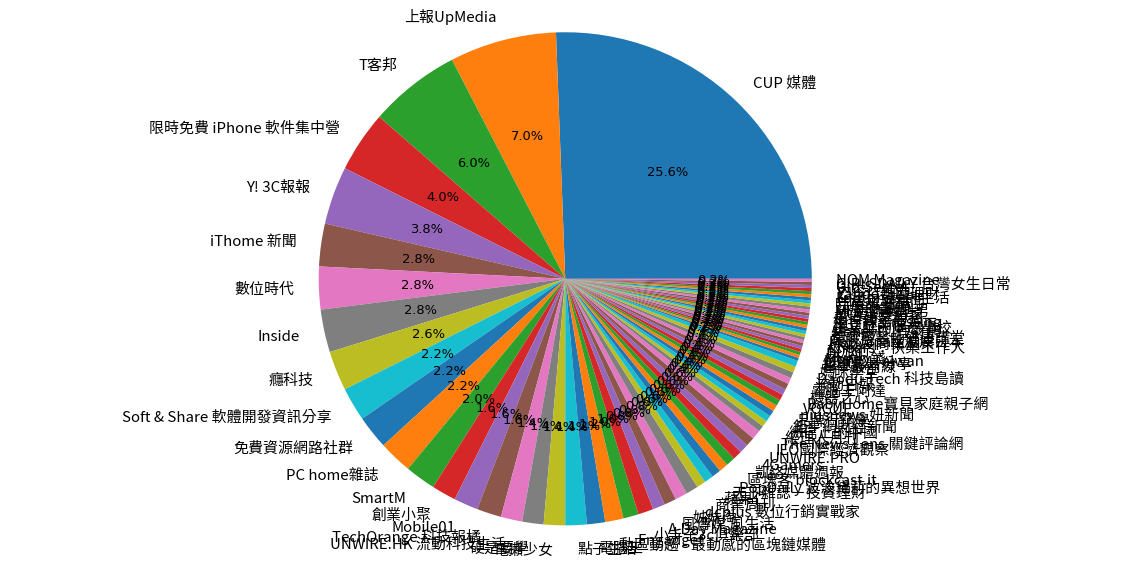

In [11]:
show_dfPlot(articles_df,plot_name='articles_df')

# 文字蒐集 / 文字雲

In [0]:
# 參考來源: https://blog.csdn.net/bentley2010/article/details/79340827

# !pip install jieba
# !pip install nltk
# !pip install wordcloud

# !wget https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SourceHanSansTC.zip
# !unzip SourceHanSansTC.zip
# !rm SourceHanSansTC.zip
# !mv ./SourceHanSansTC/* /usr/share/fonts/truetype     # !mv /SourceHanSansTC/SourceHanSansTC-Regular.otf /usr/share/fonts/truetype


In [13]:
import nltk
import jieba
import jieba.analyse
from PIL import Image
import numpy as np
import pandas as pd

from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

jieba.set_dictionary('dict.txt')             # 載入字典詞庫
jieba.load_userdict('moe.dict')              # 載入自定義詞庫
jieba.analyse.set_stop_words('停用詞.txt')      # 停用詞詞庫

# jieba.add_word(word, freq=None, tag=None)    # 加入字詞
# jieba.del_word(word)                         # 刪除字詞
# stopwords = {}.fromkeys(["今天不回家"])      # 建立停用字

Building prefix dict from /content/dict.txt ...
Loading model from cache /tmp/jieba.ueb620ec8402181953a0299d7957c0d6e.cache
Loading model cost 0.486 seconds.
Prefix dict has been built successfully.


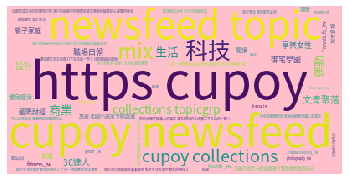

<Figure size 3e+06x1e+06 with 0 Axes>

In [14]:
# 文字雲顯示設定
# import imageio
# mask = np.array(Image.open(r"bk.png"))

# 讀取文字
Text = open("category.txt").read()

font_path = '/usr/share/fonts/truetype/SourceHanSansTC-Regular.otf'
wc = WordCloud(
        background_color='pink',         #   背景顏色
        max_words=200,                   #   最大分詞數量
        # mask=mask,                     #   背景圖片
        max_font_size=None,              #   顯示字體的最大值 
        font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
        random_state=None,               #   隨機碼生成各分詞顏色
        #prefer_horizontal=0.2           #   調整分詞中水平和垂直的比例
        )  

wc.generate(Text)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(3000,1000), dpi = 1000)
plt.show()
# wc.to_file("wordcloud.jpg")

In [0]:
# 移除停留詞，統計詞頻
def words_list_DFsegment(seg_list):
  with open('停用詞.txt','r') as f:
    stop_words = f.readlines()
  stop_words = [stop_word.rstrip() for stop_word in stop_words]

  new_list = []
  for seg in seg_list:
    if seg not in stop_words:
      new_list.append(seg) 

  seg_df = pd.DataFrame(new_list,columns=['seg'])
  seg_df['count'] = 1
  sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
  freq_df = pd.DataFrame(sef_freq)
  return freq_df


# 移除停留詞，統計詞頻
Text = open("category.txt").read()
seg_list = ''.join(Text)
words_list_DFsegment(seg_list)